# Importing Libraries

---


*   **numpy & matplotlib** heve been used for vector manipulatiion and visualisation.
*   **tensorflow & keras** have been used for importing the data and constructing the neural network model.
*   **Logistic Regression & KMeans** have been directy imported from sklearn and implented on the data.
*   The **metrics** library from sklearn is used to analyse and compare the models.
---


In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from scipy.spatial.distance import cdist

# Importing the data

--- 

* Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. 

* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single value associated with it which indicates the greyscale value.
  * The training and test data sets have 785 columns. 
  * The first column consists of the class labels, and represents the article of clothing. 
  * The rest of the columns contain the pixel-values of the associated image.

* Each training and test example is assigned to one of the following labels:
      0 T-shirt/top
      1 Trouser
      2 Pullover
      3 Dress
      4 Coat
      5 Sandal
      6 Shirt
      7 Sneaker
      8 Bag
      9 Ankle boot

---

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train_full.shape  # 60,000 matrices of size 28x28

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
X_train=X_train_full.reshape((60000,784))
X_test=X_test.reshape((10000,784))
X_test.shape, X_train_full.shape , X_train.shape , y_test.shape

((10000, 784), (60000, 28, 28), (60000, 784), (10000,))

In [ ]:
X_train = X_train/255
X_test = X_test/255

# Model 1A : Representative 1000 samples

---


In [ ]:
inertia_dict={}

In [ ]:
k=1000
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k,random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_images = X_train_full[representative_digit_idx]
inertia_dict[k]=kmeans.inertia_
y_representative_images = y_train_full[representative_digit_idx]

In [ ]:
inertia_dict

{1000: 874311.2459189012}

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr",random_state=42,max_iter=500,solver='liblinear')
log_reg.fit(X_representative_images.reshape((k,784)), y_representative_images)
log_reg.score(X_train_full.reshape((60000,784)), y_train_full)

0.7760833333333333

# Model 1B : Representative samples using Minibatch



---


In [ ]:
inertia_dict_minibatch={}

In [ ]:
minibatch_scores={}

In [ ]:
for k in range(1100,1200,10):
    kmeans_mini = MiniBatchKMeans(n_clusters=k,random_state=42)
    X_digits_dist = kmeans_mini.fit_transform(X_train)
    representative_digit_idx = np.argmin(X_digits_dist, axis=0)
    X_representative_images = X_train_full[representative_digit_idx]
    inertia_dict_minibatch[k]=kmeans_mini.inertia_
    y_representative_images = y_train_full[representative_digit_idx]

    log_reg = LogisticRegression(multi_class="ovr",random_state=42,max_iter=500,solver='liblinear')
    log_reg.fit(X_representative_images.reshape((k,784)), y_representative_images)
    minibatch_scores[k] = log_reg.score(X_train_full.reshape((60000,784)), y_train_full)

In [ ]:
for k in range(200,500,10):
    kmeans_mini = MiniBatchKMeans(n_clusters=k,random_state=42)
    X_digits_dist = kmeans_mini.fit_transform(X_train)
    representative_digit_idx = np.argmin(X_digits_dist, axis=0)
    X_representative_images = X_train_full[representative_digit_idx]
    inertia_dict_minibatch[k]=kmeans_mini.inertia_
    y_representative_images = y_train_full[representative_digit_idx]

    log_reg = LogisticRegression(multi_class="ovr",random_state=42,max_iter=500,solver='liblinear')
    log_reg.fit(X_representative_images.reshape((k,784)), y_representative_images)
    minibatch_scores[k] = log_reg.score(X_train_full.reshape((60000,784)), y_train_full)

In [ ]:
inertia_dict_minibatch

{200: 1128389.8180508912,
 210: 1118520.0905231198,
 220: 1111425.6483928794,
 230: 1103405.5347432815,
 240: 1099358.2618958429,
 250: 1091232.3094751176,
 260: 1088728.1712960028,
 270: 1080091.2439527353,
 280: 1077556.3186257295,
 290: 1073260.5625494788,
 300: 1073313.8164239398,
 310: 1061162.4377903368,
 320: 1053561.9626250293,
 330: 1055546.3462712497,
 340: 1049392.0767282664,
 350: 1052725.3403650115,
 360: 1040303.9113734942,
 370: 1040318.6783737149,
 380: 1033510.3325072741,
 390: 1033984.6874729461,
 400: 1029019.1385935578,
 410: 1025221.1707129548,
 420: 1020088.7715793735,
 430: 1023191.004701263,
 440: 1015187.932032931,
 450: 1017521.1197295256,
 460: 1010264.2709673247,
 470: 1009305.6773108908,
 480: 1295919.2157587348,
 490: 1010094.1787398993,
 1100: 1229066.7069014423,
 1110: 1234515.9473092798,
 1120: 1226206.4255412654,
 1130: 919145.0876793945,
 1140: 917552.9393592789,
 1150: 917473.70745654,
 1160: 917381.0872622875,
 1170: 913098.9632003211,
 1180: 918873

In [ ]:
minibatch_scores

{200: 0.73685,
 210: 0.7417833333333334,
 220: 0.7382833333333333,
 230: 0.7420833333333333,
 240: 0.7394666666666667,
 250: 0.73615,
 260: 0.75175,
 270: 0.7530833333333333,
 280: 0.7525166666666666,
 290: 0.74755,
 300: 0.7581166666666667,
 310: 0.7596666666666667,
 320: 0.75155,
 330: 0.7542,
 340: 0.7494166666666666,
 350: 0.7597833333333334,
 360: 0.7524,
 370: 0.7499833333333333,
 380: 0.7556666666666667,
 390: 0.7483833333333333,
 400: 0.747,
 410: 0.76295,
 420: 0.7699666666666667,
 430: 0.7678166666666667,
 440: 0.7729166666666667,
 450: 0.74985,
 460: 0.75765,
 470: 0.7632166666666667,
 480: 0.7562666666666666,
 490: 0.7727666666666667,
 500: 0.7529,
 510: 0.7606,
 520: 0.7645166666666666,
 530: 0.7717333333333334,
 540: 0.7523666666666666,
 550: 0.7608333333333334,
 560: 0.7604,
 570: 0.7737,
 580: 0.7622333333333333,
 590: 0.7707333333333334,
 600: 0.7621,
 610: 0.76055,
 620: 0.76035,
 630: 0.7779,
 640: 0.7649166666666667,
 650: 0.7744166666666666,
 660: 0.77685,
 670: 0.

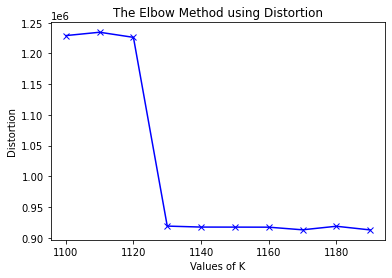

In [ ]:
K=range(1100,1200,10)
inert=[]
for i in K:
  inert.append(inertia_dict_minibatch[i])
plt.plot(K, inert, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

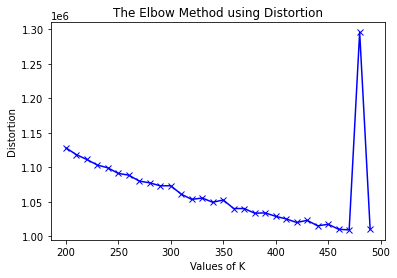

In [ ]:
K=range(200,500,10)
inert=[]
for i in K:
    inert.append(inertia_dict_minibatch[i])
plt.plot(K, inert, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

# Model 2 : Supervised leaning on k repesentatives via Logistic Regression

---


In [ ]:
k = 1130
kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]
y_representative_digits = y_train_full[representative_digit_idx]

In [ ]:
representative_digit_idx.shape    # index of 1130 clusters

(1130,)

In [ ]:
X_digits_dist[0]   # distance of first image in training data from the 1st cluster is 12.32623285

array([12.32623285, 12.67301294, 11.88148864, ..., 13.48600602,
       14.6120136 , 12.77071353])

In [ ]:
X_digits_dist.shape  # 1130 columns and 6000 rows

(60000, 1130)

In [ ]:
log_reg = LogisticRegression(multi_class="ovr",random_state=42,max_iter=500,solver='liblinear')
log_reg.fit(X_representative_digits.reshape((k,784)), y_representative_digits)
log_reg.score(X_train_full.reshape((60000,784)), y_train_full)

0.7828666666666667

In [ ]:
log_reg.score(X_test, y_test)

0.8056

# Model 3 : Supervised leaning on k repesentatives via Feed Forward Neural Network

---


In [ ]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[784]),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="adam",
metrics=["accuracy"])

In [ ]:
history = model.fit(X_representative_digits.reshape((k,784)), y_representative_digits, epochs=100)

Epoch 1/100
36/36 [==============================] - 0s 3ms/step - loss: 1.4784 - accuracy: 0.5053
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 0.7329 - accuracy: 0.7389
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6270 - accuracy: 0.7726
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 0.5130 - accuracy: 0.8195
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4543 - accuracy: 0.8407
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.4107 - accuracy: 0.8558
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 0.3843 - accuracy: 0.8619
Epoch 8/100
36/36 [==============================] - 0s 3ms/step - loss: 0.3983 - accuracy: 0.8628
Epoch 9/100
36/36 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.8929
Epoch 10/100
36/36 [==============================] - 0s 3ms/step - loss: 0.3382 - accuracy: 0.8850
Epoch 11/

In [ ]:
model.evaluate(X_train_full,y_train_full)

1875/1875 [==============================] - 3s 2ms/step - loss: 278.5142 - accuracy: 0.8206


[278.51416015625, 0.8206333518028259]